# Analisis Data GDP dunia

## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pandasql import sqldf

### Import Data

In [3]:
data=pd.read_table("D:\D\Project\GDP\GDP.csv",sep=",")

In [4]:
data.tail()

,Year,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Uruguay,United States,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Former Yugoslavia,South Africa,Zambia,Zimbabwe
768,2014.0,"2,022","8,673","9,808","72,601","19,183","9,735","47,867","41,338","17,439",...,"19,160","51,664","9,085","20,317","5,455","4,054","14,627","12,242","3,478","1,594"
769,2015.0,"1,928","8,689","10,032","74,746","19,502","10,042","48,357","41,294","17,460",...,"19,244","52,591","9,720","18,802","5,763","2,844","14,971","12,246","3,478","1,560"
770,2016.0,"1,929","8,453","10,342","75,876","18,875","10,080","48,845","41,445","16,645",...,"19,468","53,015","10,381","15,219","6,062","2,506","15,416","12,139","3,479","1,534"
771,2017.0,"2,015","8,146","10,702","76,643","19,201","10,859","49,266","42,177","16,522",...,"19,918","54,008","10,744","12,879","6,422","2,322","15,961","12,189","3,498","1,582"
772,2018.0,"1,935","7,771","11,104","76,398","18,556","11,454","49,831","42,988","16,628",...,"20,186","55,335","11,220","10,710","6,814","2,285","16,558","12,166","3,534","1,611"


In [5]:
data_2018= data.loc[772]

In [6]:
data_2018= data_2018.reset_index()
data_2018.head()

,index,772
0,Year,2018.0
1,Afghanistan,"1,935"
2,Angola,"7,771"
3,Albania,"11,104"
4,United Arab Emirates,"76,398"


### Tarik map dunia

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

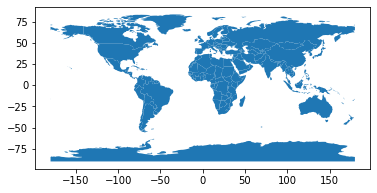

In [8]:
world.plot()

In [9]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Keluarkan Antartika

In [10]:
world=world[world.name!="Antarctica"]

In [11]:
world_join= world.merge(data_2018, how="left", left_on="name", right_on="index")

In [12]:
world_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     176 non-null    int64   
 1   continent   176 non-null    object  
 2   name        176 non-null    object  
 3   iso_a3      176 non-null    object  
 4   gdp_md_est  176 non-null    float64 
 5   geometry    176 non-null    geometry
 6   index       131 non-null    object  
 7   772         131 non-null    object  
dtypes: float64(1), geometry(1), int64(1), object(5)
memory usage: 12.4+ KB


In [17]:
world_join[world_join['index'].isnull()]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,772
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.000 -16.067, 180.000 -16.5...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.904 -0.950, 34.073 -1.060, 37.699...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.666 27.656, -8.665 27.589, -8.684...",NaN,NaN
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0...",NaN,NaN
7,6909701,Oceania,Papua New Guinea,PNG,28020.00,"MULTIPOLYGON (((141.000 -2.600, 142.735 -3.289...",NaN,NaN
11,83301151,Africa,Dem. Rep. Congo,COD,66010.00,"POLYGON ((29.340 -4.500, 29.520 -5.420, 29.420...",NaN,NaN
12,7531386,Africa,Somalia,SOM,4719.00,"POLYGON ((41.585 -1.683, 40.993 -0.858, 40.981...",NaN,NaN
14,37345935,Africa,Sudan,SDN,176300.00,"POLYGON ((24.567 8.229, 23.806 8.666, 23.459 8...",NaN,NaN
17,10734247,North America,Dominican Rep.,DOM,161900.00,"POLYGON ((-71.708 18.045, -71.688 18.317, -71....",NaN,NaN
18,142257519,Europe,Russia,RUS,3745000.00,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",NaN,NaN


<AxesSubplot:>

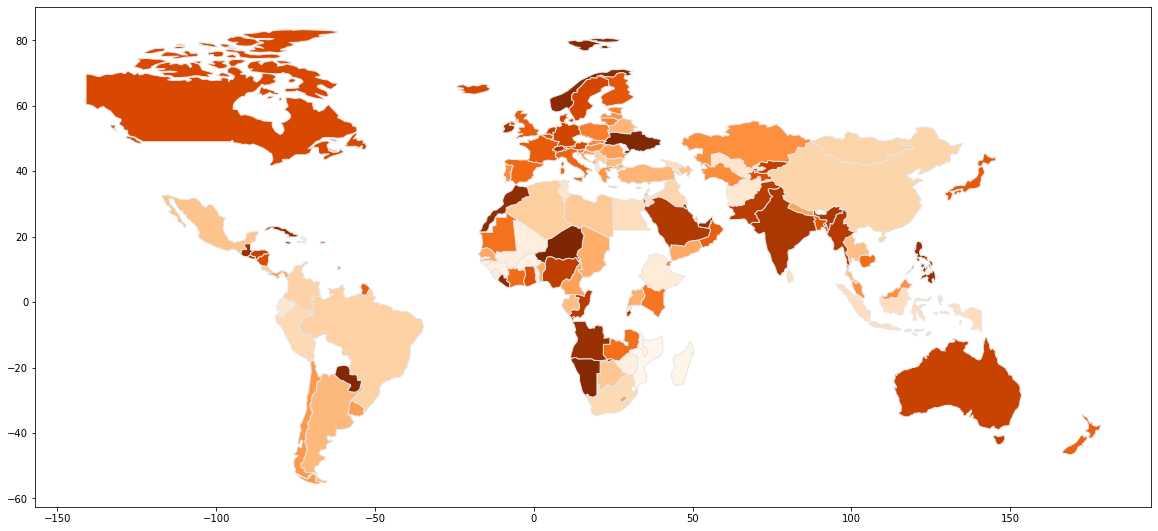

In [50]:
world_join.plot(column=772, cmap='Oranges', figsize=(20,20), linewidth=1, edgecolor='0.9')